In [15]:
# РК1 Кравцов Андрей ИУ5-64Б Вариант 10
# Задача №2.
# Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного 
# количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков 
# Вы использовали?
# Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import math
%matplotlib inline

data = pd.read_csv("marvel-wikia-data.csv")
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [16]:
print(data.columns)

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')


In [17]:
#обработка пропусков в данных
round(data.isna().sum()/(data.count()+data.isna().sum()), 2) * 100

page_id              0.0
name                 0.0
urlslug              0.0
ID                  23.0
ALIGN               17.0
EYE                 60.0
HAIR                26.0
SEX                  5.0
GSM                 99.0
ALIVE                0.0
APPEARANCES          7.0
FIRST APPEARANCE     5.0
Year                 5.0
dtype: float64

In [19]:
#заполнение самым частым значением категориального признака
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['SEX'] = imp.fit_transform(data[['SEX']])
data.SEX.describe()

count               16376
unique                  4
top       Male Characters
freq                12492
Name: SEX, dtype: object

In [21]:
#заполнение медианным способом количественного признака
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['APPEARANCES'] = imp.fit_transform(data[['APPEARANCES']])
data.APPEARANCES.describe()

count    16376.000000
mean        16.094162
std         93.157959
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       4043.000000
Name: APPEARANCES, dtype: float64

In [22]:
round(data.isna().sum()/(data.count()+data.isna().sum()), 2) * 100

page_id              0.0
name                 0.0
urlslug              0.0
ID                  23.0
ALIGN               17.0
EYE                 60.0
HAIR                26.0
SEX                  0.0
GSM                 99.0
ALIVE                0.0
APPEARANCES          0.0
FIRST APPEARANCE     5.0
Year                 5.0
dtype: float64

<AxesSubplot:xlabel='Year'>

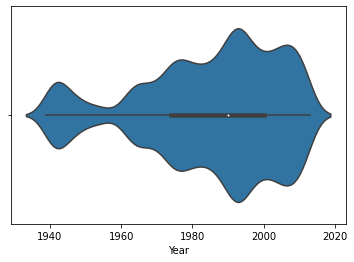

In [24]:
import seaborn as sns
sns.violinplot(x=data['Year'])

In [ ]:
# Для дальнейшего построения моделей следует использовать признак APPEARANCES с категориальными признаками